# Social Networking Service

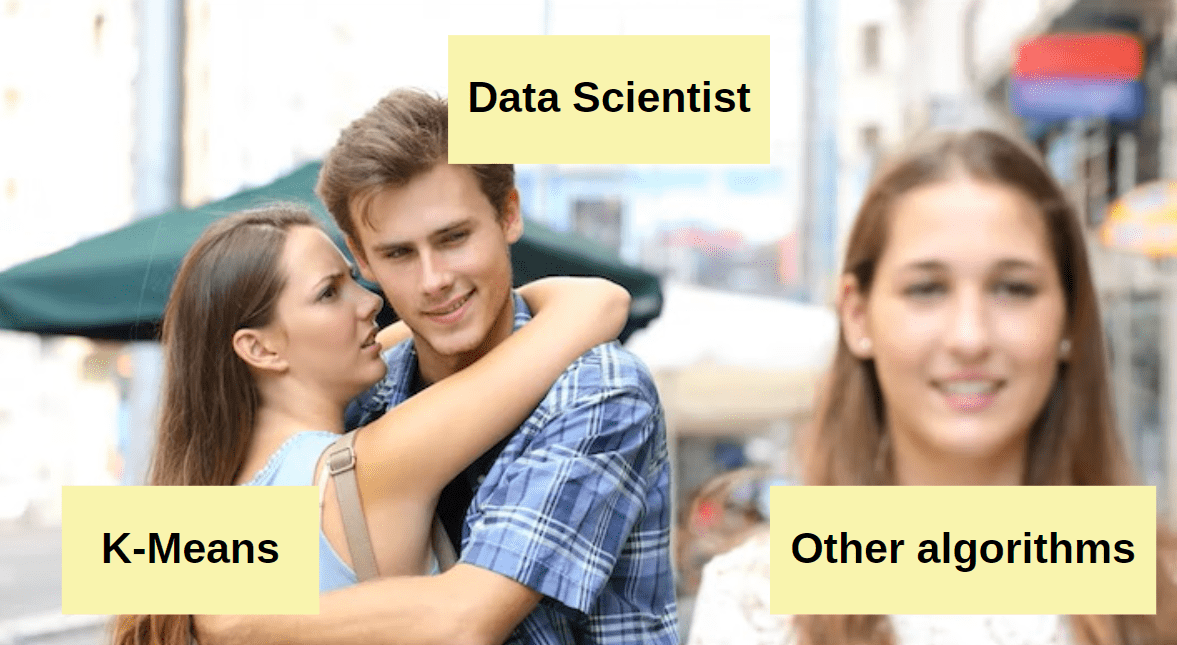

## Teen Market Segmentation Using K-means Clustering¶

***Interacting with friends on a social networking service (SNS) has become a rite of passage for teenagers around the world. The many millions of teenage consumers using such sites have attracted the attention of marketers struggling to find an edge in an increasingly competitive market. One way to gain this edge is to identify segments of teenagers who share similar tastes, so that clients can avoid targeting advertisements to teens with no interest in the product being sold. For instance, sporting apparel is likely to be a difficult sell to teens with no interest in sports.***

***We are going to build K-means clustering model to classify the interest of teenagers by using various attributes.***

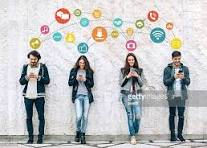

## Dataset Information

***The dataset represents a random sample of 30,000 U.S. high school students who had profiles on a well-known SNS in 2006. To protect the users’ anonymity, the SNS will remain unnamed. The data was sampled evenly across four high school graduation years (2006 through 2009) representing the senior, junior, sophomore, and freshman classes at the time of data collection***

***The dataset contatins 40 variables like: gender, age, friends, basketball, football, soccer, softball, volleyball,swimming, cute, sexy, kissed, sports, rock, god, church, bible, hair, mall, clothes, hollister, drugs etc whcih shows their interests. The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile***

# Loading Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Nikhil Nandugade\Downloads\snsdata.csv\snsdata.csv")

In [3]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
df.shape

(30000, 40)

In [6]:
df.size

1200000

In [7]:
pd.DataFrame(list(df))

,0
0,gradyear
1,gender
2,age
3,friends
4,basketball
5,football
6,soccer
7,softball
8,volleyball
9,swimming


# Check for Information & Data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [9]:
df.describe()  #### Statistical parameters of Numerical columns

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [10]:
df.describe(include=["O"])  #### Statistical parameters of Categorical columns

,gender
count,27276
unique,2
top,F
freq,22054


In [11]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (650, 40)


# Missing value Treatment

In [12]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

***A total of 5,086 records have missing ages. Also concerning is the fact that the minimum and maximum values seem to be unreasonable; it is unlikely that a 3 year old or a 106 year old is attending high school.***

<Axes: >

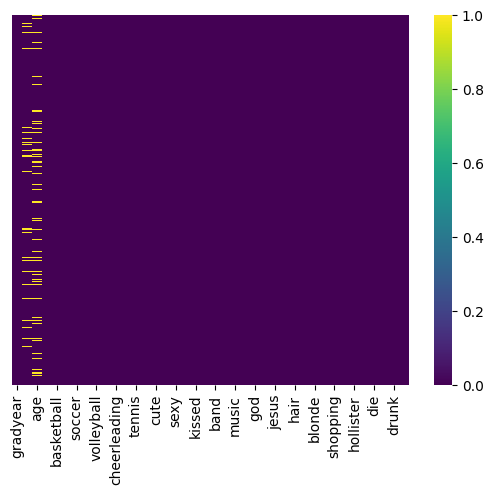

In [13]:
sns.heatmap(df.isnull(),yticklabels= False,cmap="viridis")

In [14]:
def check_missing(x):
    x= x.isnull().sum()*100/ len(x)
    x= x[x>0]
    x= x.sort_values(ascending= False)
    return x
check_missing(df)

age       16.953333
gender     9.080000
dtype: float64

## Let's have a look at the number of male and female candidates in our dataset

In [15]:
df['gender'].value_counts()

gender
F    22054
M     5222
Name: count, dtype: int64

## Let's have a look at the number of male, female and missing values

In [16]:
df['gender'].value_counts(dropna = False) #display NaN values also

gender
F      22054
M       5222
NaN     2724
Name: count, dtype: int64

***There are 22054 female, 5222 male teen students and 2724 missing values***

## Now we are going to fill all the null values in gender column with “Not disclosed”

In [17]:
df['gender'].fillna('not disclosed', inplace = True)

In [18]:
df['gender'].isnull().sum()

0

***Also, the age cloumn has 5086 missing values.***

## One way to deal with these missing values would be to fill the missing values with the average age of each graduation year

In [19]:
df.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

***From the above summary we can observe that the mean age differs by roughly one year per change in graduation year. This is not at all surprising, but a helpful finding for confirming our data is reasonable***

## We now fill the missing values for each graduation year with the mean that we got as above

In [20]:
df['age'].mean()

17.99394954643975

In [21]:
df['age'] = df['age'].fillna(17.99394954643975)

In [22]:
df.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [23]:
check_missing(df)

Series([], dtype: float64)

***From the above summary we can see that there are no missing values in the dataset***

# EDA

## Visualization : Histogram of age distribution

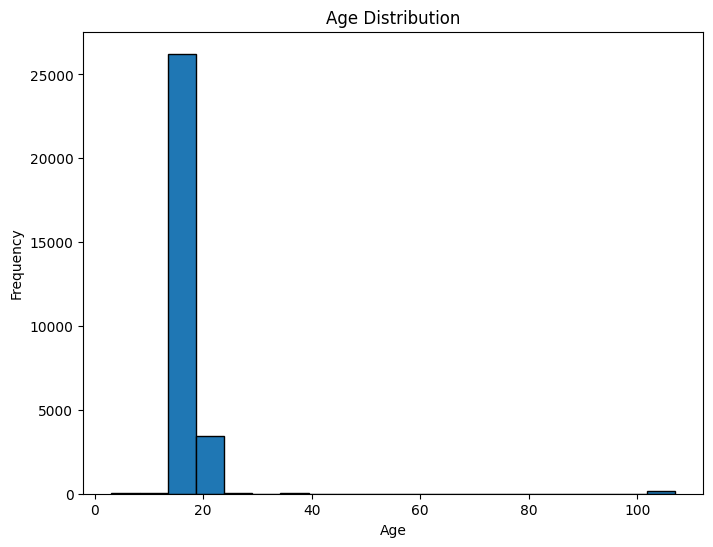

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Visualization : Gender distribution

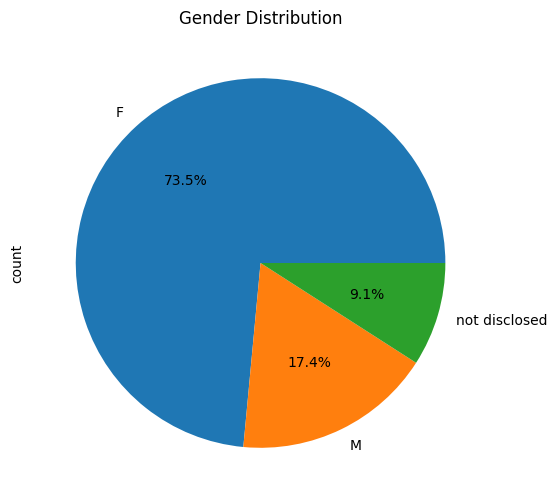

In [25]:
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

## Visualization : Bar plot of Gender vs. Age

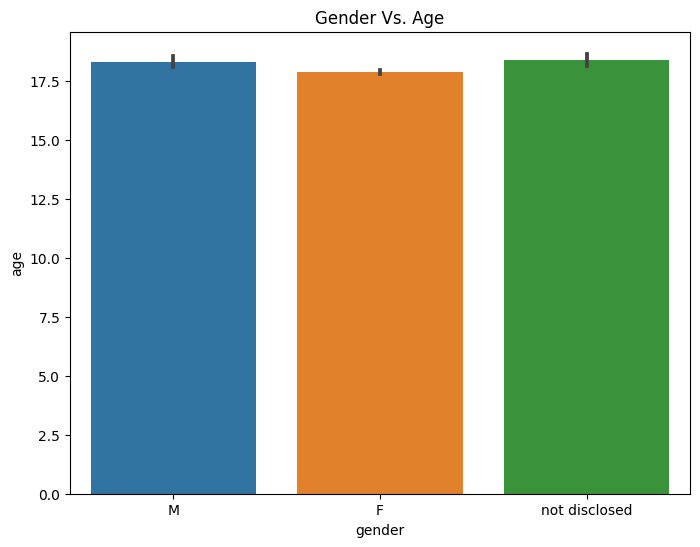

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='gender', y='age')
plt.xlabel('gender')
plt.ylabel('age')
plt.title('Gender Vs. Age')
plt.show()

## Visualization : Stacked bar plot of Gradyear Vs. Age by Gender

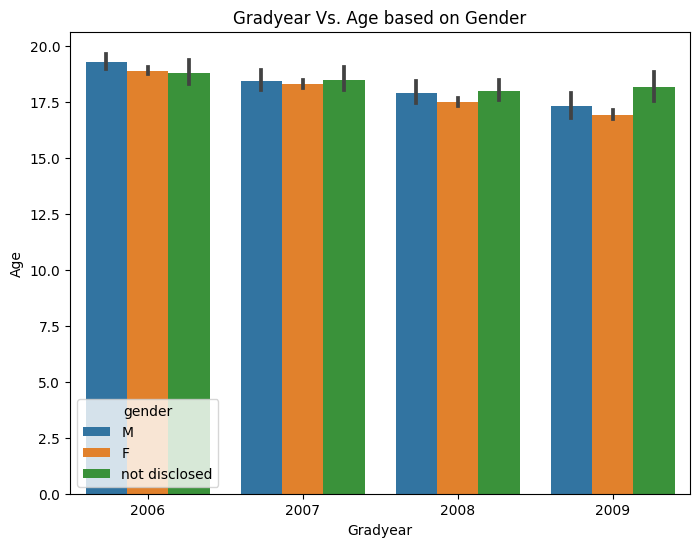

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='gradyear', y='age', hue='gender')
plt.xlabel('Gradyear')
plt.ylabel('Age')
plt.title('Gradyear Vs. Age based on Gender')
plt.show()

## Visualization : Scatter plot of Gradyear Vs. Age

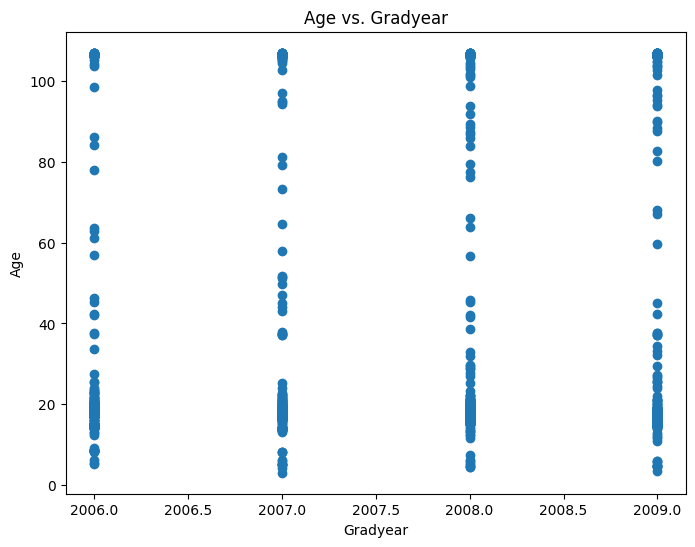

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df['gradyear'], df['age'])
plt.xlabel('Gradyear')
plt.ylabel('Age')
plt.title('Age vs. Gradyear')
plt.show()

## Visualization : Violin plot of Gender Distribution by Friends

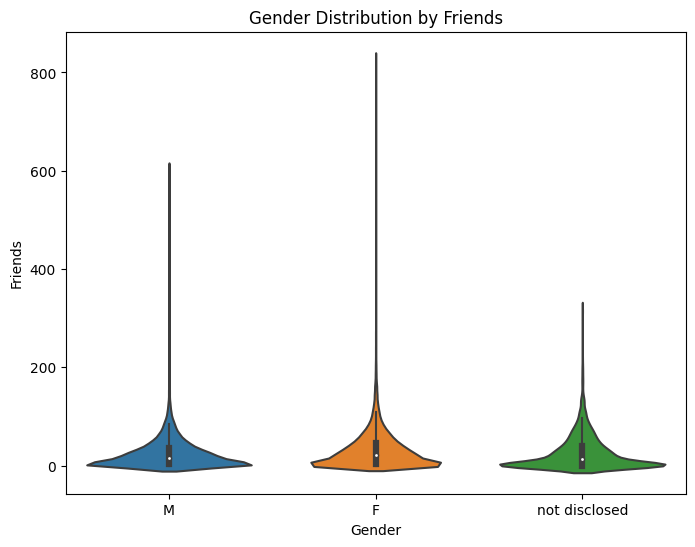

In [29]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='gender', y='friends')
plt.xlabel('Gender')
plt.ylabel('Friends')
plt.title('Gender Distribution by Friends')
plt.show()

## Histogram plot

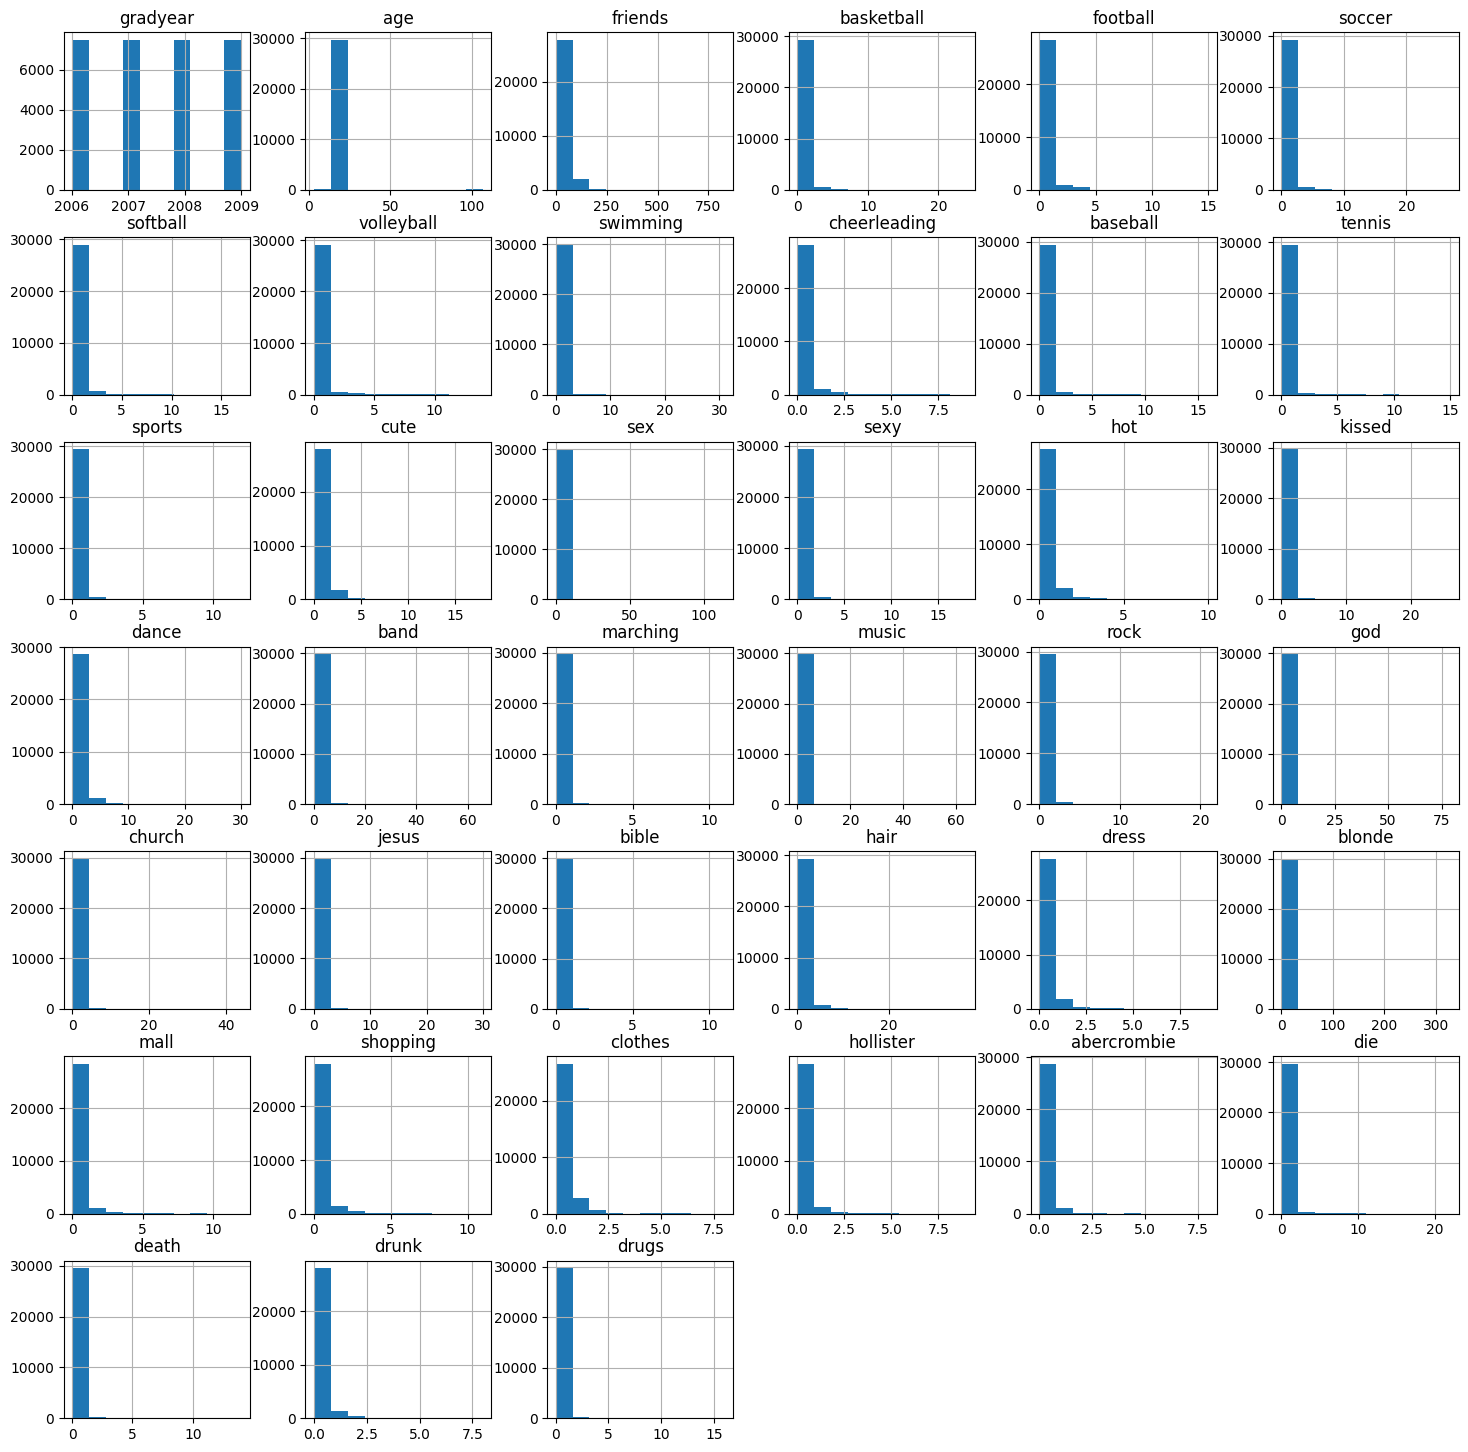

In [30]:
fig = df.hist(figsize = (18,18))

# Treating Outliers

***The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. A reasonable age range for people attending high school will be the age range between 13 to 21. The rest should be treated as outliers keeping the age of student going to high school in mind.***

***Let's detect the outliers using a box plot below***

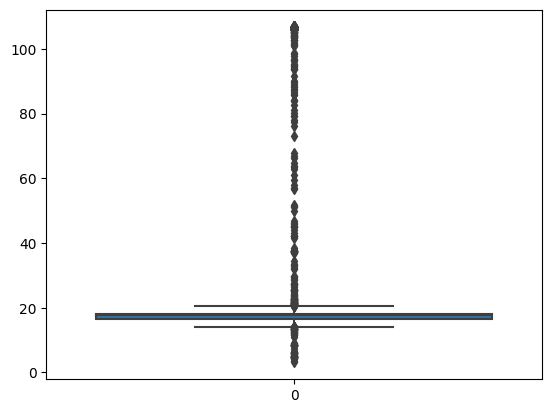

In [31]:
sns.boxplot(df['age'])
plt.show()

In [32]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1

In [33]:
print(iqr)

1.5629999999999988


In [34]:
df1 = df[(df['age'] > (q1 - 1.5*iqr)) & (df['age'] < (q3 + 1.5*iqr))]
df1['age'].describe()

count    29592.000000
mean        17.387704
std          1.090545
min         14.188000
25%         16.501000
50%         17.644000
75%         18.029000
max         20.411000
Name: age, dtype: float64

***From the above summary we can observe that after treating the outliers the mininmum age is 14.188000 and the maximum age is 20.411000***

In [35]:
df.shape

(30000, 40)

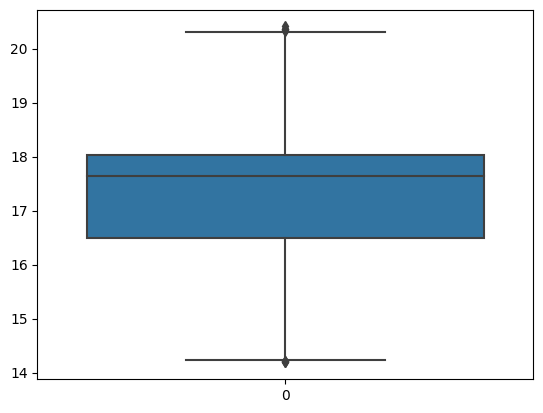

In [36]:
sns.boxplot(df1["age"])
plt.show()

***From the above boxplot we observe that there are no outliers in the age column***

# Data Processing

***A common practice employed prior to any analysis using distance calculations is to normalize or z-score standardize the features so that each utilizes the same range. By doing so, you can avoid a problem in which some features come to dominate solely because they have a larger range of values than the others.***


***The process of z-score standardization rescales features so that they have a mean of zero and a standard deviation of one. This transformation changes the interpretation of the data in a way that may be useful here. Specifically, if someone mentions Swimming three times on their profile, without additional information, we have no idea whether this implies they like Swimming more or less than their peers. On the other hand, if the z-score is three, we know that that they mentioned Swimming many more times than the average teenager.***

In [37]:
names = df1.columns[4:40]
scaled_feature = df.copy()
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [38]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [39]:
features = scaled_feature[names]

In [40]:
features.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [42]:
features = scaler.transform(features.values)

In [43]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


## Convert object variable to numeric

In [44]:
def gender_to_numeric(x):
    if x=="M":
        return 1
    if x=="F":
        return 2
    if x== 'not disclosed':
        return 3                        ### we can also used create dummies/ one hot encoding

In [45]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

## Checkig the transformed values

In [46]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


# Building the K-means model

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [48]:
model = kmeans.fit(scaled_feature)
model

KMeans(n_clusters=5, random_state=0)

# Elbow Method

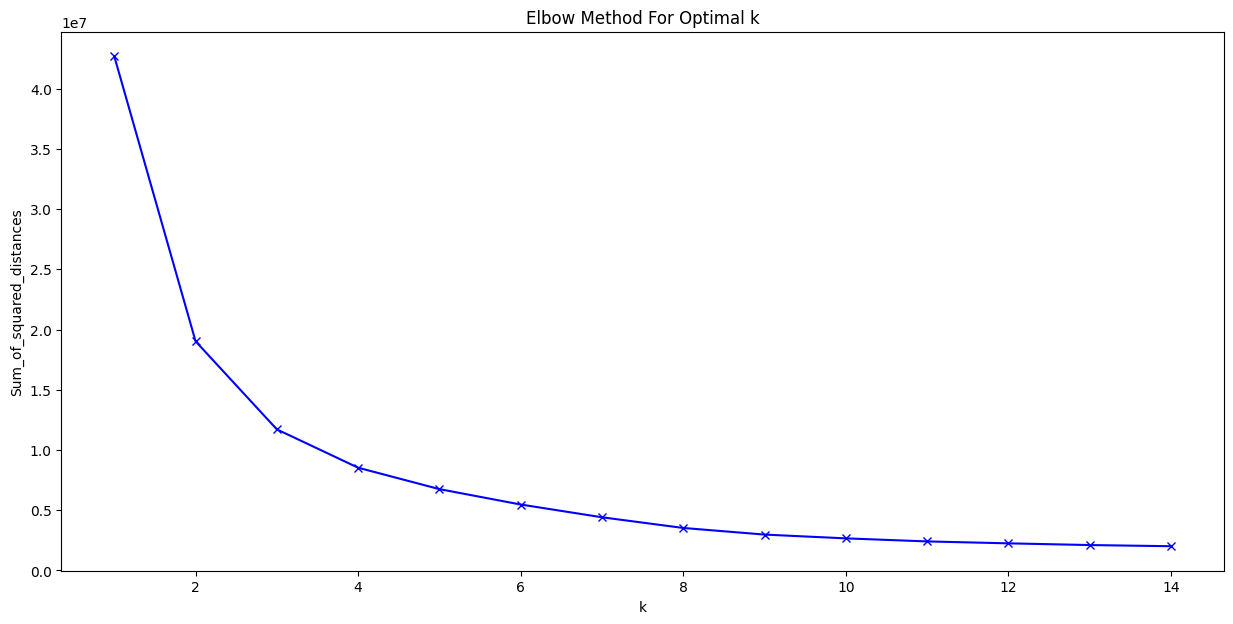

In [49]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_feature)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(15,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

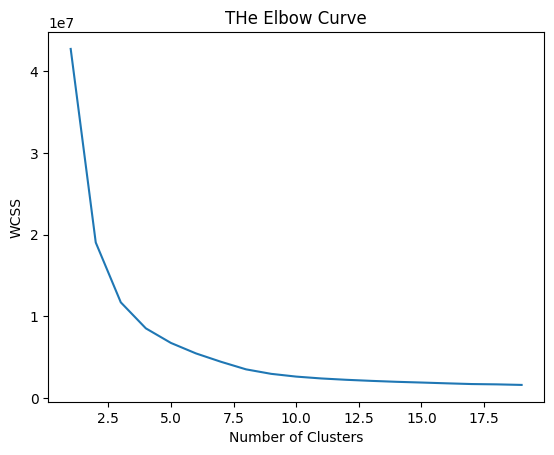

In [50]:
# Creating a function with KMeans to plot "The Elbow Curve"

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

***The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5. We will use k=5 to further interpret our clustering result.***

# Fit K-Means clustering for k=5

In [51]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [52]:
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [53]:
len(kmeans.labels_)

30000

In [54]:
df['cluster'] = kmeans.labels_

In [55]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Interpreting Clustering Results

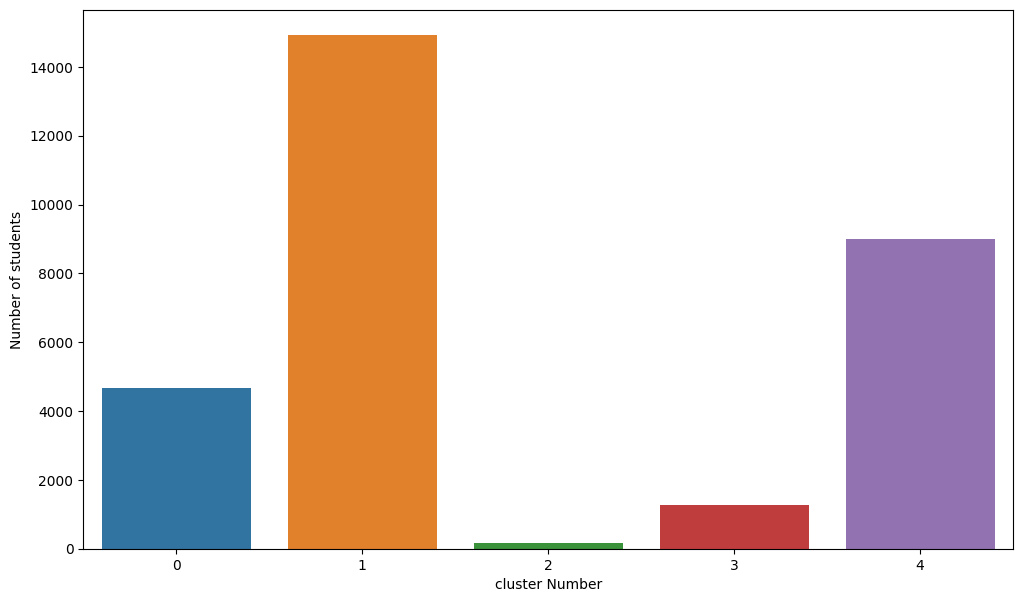

In [56]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=df.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

***From the above plot we can see that cluster 0(1) is the largest and cluster 3(4) has fewest teen students.***

# Let' see the number of students belonging to each cluster

In [57]:
size_array = list(df.groupby(['cluster']).count()['age'].values)
size_array

[4663, 14915, 155, 1275, 8992]

***The cluster center values shows each of the cluster centroids of the coordinates. The row referes to the five clusters,the numbers across each row indicates the cluster’s average value for the interest listed at the top of the column. Positive values are above the overall mean level.***

## Performance Measures

In [58]:
ab =kmeans.fit_predict(scaled_feature)

In [59]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
silhouette_avg = silhouette_score(scaled_feature, ab)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4943410922510318


In [60]:
calinski_harabasz_index = calinski_harabasz_score(scaled_feature, ab)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 39913.881710959584


In [61]:
davies_bouldin_index = davies_bouldin_score(scaled_feature, ab)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.6480328620228676


In [62]:
from sklearn.cluster import AgglomerativeClustering

# Creating an instance of AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fitting the hierarchical clustering model
agg_labels = agg_cluster.fit_predict(scaled_feature)

# Evaluating performance measures
silhouette_avg_agg = silhouette_score(scaled_feature, agg_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_agg}")

calinski_harabasz_index_agg = calinski_harabasz_score(scaled_feature, agg_labels)
print(f"Calinski-Harabasz Index for Hierarchical Clustering: {calinski_harabasz_index_agg}")

davies_bouldin_index_agg = davies_bouldin_score(scaled_feature, agg_labels)
print(f"Davies-Bouldin Index for Hierarchical Clustering: {davies_bouldin_index_agg}")

Silhouette Score for Hierarchical Clustering: 0.46906663892112593
Calinski-Harabasz Index for Hierarchical Clustering: 35509.37044114598
Davies-Bouldin Index for Hierarchical Clustering: 0.7116703309168202
